# Corrigé Exercice 1. Neurones (suite)

In [1]:
%matplotlib nbagg

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Question 1.

In [2]:
# importer les 3 jeux de donnees
nerve = pd.read_csv('http://www.proba.jussieu.fr/pageperso/rebafka/nerve.csv',squeeze=True)
nerve2 = pd.read_csv('http://www.proba.jussieu.fr/pageperso/rebafka/nerve2.csv',squeeze=True)
nerve3 = pd.read_csv('http://www.proba.jussieu.fr/pageperso/rebafka/nerve3.csv',squeeze=True)

## Question 2.

In [3]:
# nb de mesures par personne
print nerve.size, nerve2.size, nerve3.size

805 480 551


## Question 3.

In [4]:
print nerve.describe()
print nerve2.describe()
print nerve3.describe()

count    799.000000
mean       0.218573
std        0.209189
min        0.010000
25%        0.070000
50%        0.150000
75%        0.300000
max        1.380000
Name: x, dtype: float64
count    480.000000
mean       0.207625
std        0.175622
min        0.000000
25%        0.100000
50%        0.170000
75%        0.280000
max        1.860000
Name: x, dtype: float64
count    551.000000
mean       0.214719
std        0.168430
min        0.000000
25%        0.130000
50%        0.180000
75%        0.250000
max        1.600000
Name: x, dtype: float64


Les moyennes sont très proches les un des autres, les médianes un peu moins.

Plus de différences pour les écarts-types et les valeurs maximales.

En résumé, les trois jeux de données ont des caractéristiques semblables, mais pas identiques.

## Question 4.

La fonction de répartition pour des données $X_1, \cdots, X_n$ est la fonction définie comme:
$$F: x\in \mathbb{R}\mapsto \frac{\#\{i:X_i \leq x\}}{n}\in [0,1]$$

À l'aide de la représentation graphique d'une fonction de répartition, on peut tirer des informations comme par exemple des statistiques de position (Le quantile d'ordre $\alpha$ est l'abscisse de l'intersection entre la droite horizontale $y=\alpha$ et la fonction de répartition), des statistiques de dispersion (Les écarts inter-quantiles à partir des quantiles) ou encore une idée de la forme de la distribution (en regardant à quelle vitesse croît la fonction de répartition).

---

Pour les questions suivantes, on définit une fonction **fdr(t,obs)** qui calcule la fonction de répartition (associée aux données **obs**) pour les valeurs **t**. On définit aussi une fonction **plot_fdr(obs,a,b)** qui affiche la fonction de répartition (associée aux données **obs**) pour toutes les valeurs comprises entre **a** et **b**.

In [5]:
def fdr(t,obs):
    # t : vecteur de points ou on veut evaluer la fdr
    # obs : Series avec les observations
    y = pd.Series(np.arange(0.,len(t),1))
    for i in range(len(t)):
        y[i] = (obs<=t[i]).mean()
    return y 

In [6]:
obs = pd.Series([5,2,4,2,7,5.])
t = [2.,.4,5]
fdr(t,obs)

0    0.333333
1    0.000000
2    0.833333
dtype: float64

In [7]:
X = np.array([3,6,5])
np.append(X,[1,7])

array([3, 6, 5, 1, 7])

In [8]:
def plot_fdr(obs,a,b):
    X = obs.unique()
    X =  X[(X>=a)&(X<=b)]
    X = np.append(X,[a,b])
    X = np.sort(X)
    fdr_val = fdr(X,obs)
#    courbe = plt.plot(X,fdr_val, drawstyle='steps-post')  
    courbe = plt.step(X,fdr_val,where='post')
    plt.axis([a,b,-.05,1.05])
    return courbe

Pour tracer une fonction en escalier, il y a deux possibilités équivalentes :

- utiliser l'option **drawstyle** dans **plt.plot** (pour la fonction de répartition: **drawstyle='steps-post'**)
- utiliser la fonction **plt.step** avec l'option **'where='post'** pour la fonction de répartition

<IPython.core.display.Javascript object>


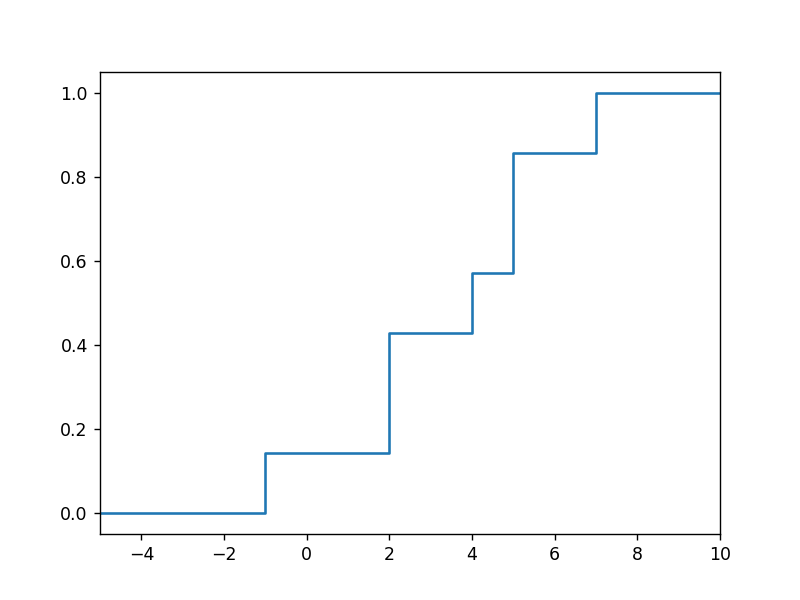

In [9]:
# test 
obs = pd.Series([-1,5,2,4,2,7,5.])
a,b = -5,10
plot_fdr(obs,a,b)

## Question 6.

<IPython.core.display.Javascript object>


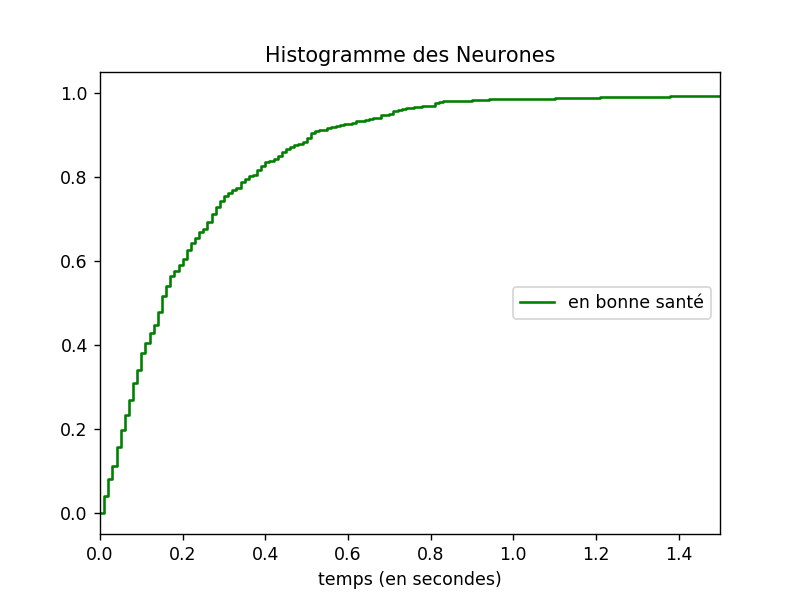

C:\Users\Arnaud\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Arnaud\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less_equal
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
plt.figure(2)
plt.title('Histogramme des Neurones')
plt.xlabel('temps (en secondes)')
fig_fdr = plot_fdr(nerve,0,1.5)
plt.setp(fig_fdr,color='g',linestyle='-')
plt.legend([u'en bonne santé'],loc=5)

## Question 7.

<IPython.core.display.Javascript object>


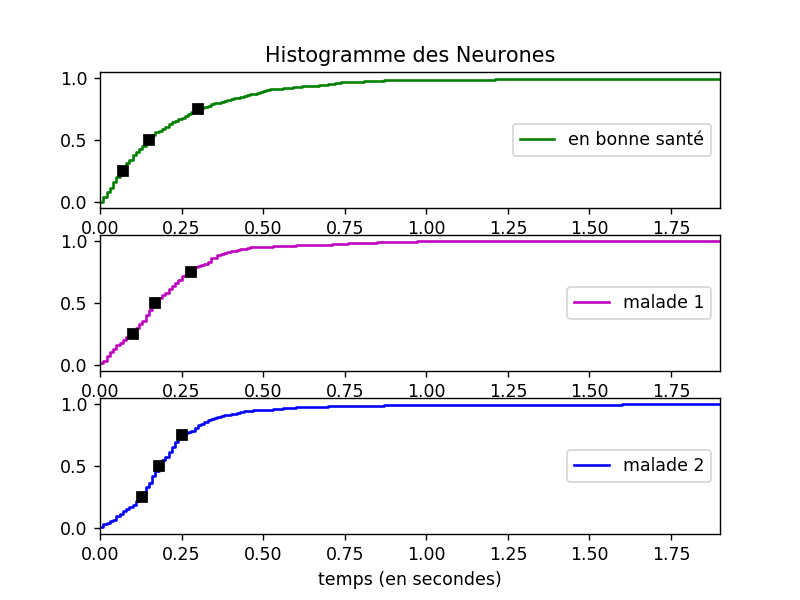

C:\Users\Arnaud\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Arnaud\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less_equal
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0,u'temps (en secondes)')

In [11]:
plt.figure(3)

plt.subplot(311)
fig_fdr1 = plot_fdr(nerve,0,1.9)
plt.setp(fig_fdr1,color='g',linestyle='-')
plt.legend([u'en bonne santé'],loc=5)
plt.title('Histogramme des Neurones')


a = [.25,.5,.75]
quant_x = nerve.quantile(a).values
plt.plot(quant_x,a,'ks')

plt.subplot(312)
fig_fdr2 = plot_fdr(nerve2,0,1.9)
plt.setp(fig_fdr2,color='m',linestyle='-')
plt.legend(['malade 1'],loc=5)

quant_x = nerve2.quantile(a).values
plt.plot(quant_x,a,'ks')

plt.subplot(313)
fig_fdr3 = plot_fdr(nerve3,0,1.9)
plt.setp(fig_fdr3,color='b',linestyle='-')
plt.legend(['malade 2'],loc=5)

quant_x = nerve3.quantile(a).values
plt.plot(quant_x,a,'ks')
plt.xlabel('temps (en secondes)')

## Question 8.

<IPython.core.display.Javascript object>


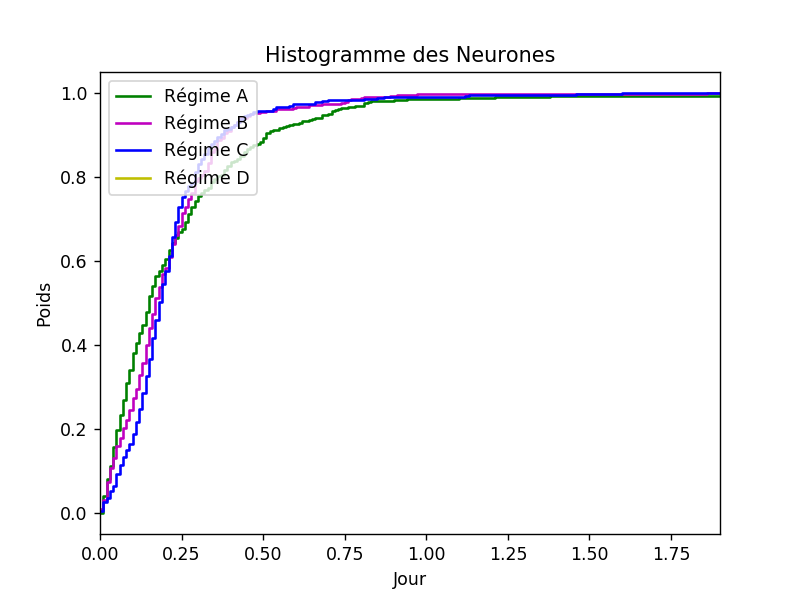

C:\Users\Arnaud\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Arnaud\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less_equal
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
plt.figure(4)
plt.title('Histogramme des Neurones')
plt.xlabel('temps (en secondes)')
fig_fdr1 = plot_fdr(nerve,0,1.9)
fig_fdr2 = plot_fdr(nerve2,0,1.9)
fig_fdr3 = plot_fdr(nerve3,0,1.9)
plt.setp(fig_fdr1,color='g',linestyle='-')
plt.setp(fig_fdr2,color='m',linestyle='-')
plt.setp(fig_fdr3,color='b',linestyle='-')
plt.legend([u'bonne santé','malade 1', 'malade2'],loc=5)

## Question 9.

D'après le graphique précédent, on voit que la médiane du temps d'attente est un peu plus élevée chez les personnes malades plutôt que chez les personnes en bonne santé. On remarque aussi que la fonction de répartition chez une personne malade croît plus doucement au début et ensuite croît beaucoup plus rapidement que la fonction de répartition chez une personne en bonne santé. Ainsi, il semblerait que le temps d'attente soit beaucoup plus concentré autour de la moyenne pour une personne malade plutôt que pour une personne en bonne santé.

# Corrigé Exercice 2. Représentations d'une distribution


In [13]:
chick = pd.read_csv('http://www.proba.jussieu.fr/pageperso/rebafka/chicken.csv')
chick.head()

,ID,regime,jour,poids
0,1,A,0,42
1,2,A,0,40
2,3,A,0,43
3,4,A,0,42
4,5,A,0,41


## Question 1

Extraire les identifiants de tous les poussins :

In [14]:
all_chick = chick['ID'].unique()
all_chick

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], dtype=int64)

Obtenir les différents régimes :

In [15]:
chick['regime'].unique()

array(['A', 'B', 'C', 'D'], dtype=object)

Afin de sélectionner deux poussins par régime, on va utiliser les données du 1er jour :

In [16]:
chick_0 = chick.loc[chick['jour']==0] 
chick_0.head()

,ID,regime,jour,poids
0,1,A,0,42
1,2,A,0,40
2,3,A,0,43
3,4,A,0,42
4,5,A,0,41


On crée un array **id_subset** pour y stocker les ID qu'on va sélectionner par la suite :

In [17]:
id_subset = np.arange(0, 8) 

id_A = chick_0.loc[chick_0['regime']=='A','ID']
id_subset[[0,4]] = id_A.values[0:2]

id_B = chick_0.loc[chick_0['regime']=='B','ID']
id_subset[[1,5]] = id_B.values[0:2]

id_C = chick_0.loc[chick_0['regime']=='C','ID']
id_subset[[2,6]] = id_C.values[0:2]

id_D = chick_0.loc[chick_0['regime']=='D','ID']
id_subset[[3,7]] = id_D.values[0:2]

id_subset

array([ 1, 21, 31, 41,  2, 22, 32, 42])

On trace la figure en utilisant une boucle for :

In [18]:
#plt.figure(1)
col_list = ['y','b','r','g']
for pous in id_subset:
    days = chick.loc[chick['ID']==pous,'jour']
    weight = chick.loc[chick['ID']==pous,'poids']
    reg = chick.loc[chick['ID']==pous,'regime'].unique()
    col=  col_list[np.argmax(list('ABCD')==reg)]
    plt.plot(days,weight,color=col)

plt.legend([u"Régime A", u"Régime B", u"Régime C", u"Régime D"], loc=2)
plt.xlabel("Jour")
plt.ylabel("Poids")

Text(0,0.5,u'Poids')

## Question 2

On utilise les données **chick_0** associées au premier jour :

<IPython.core.display.Javascript object>


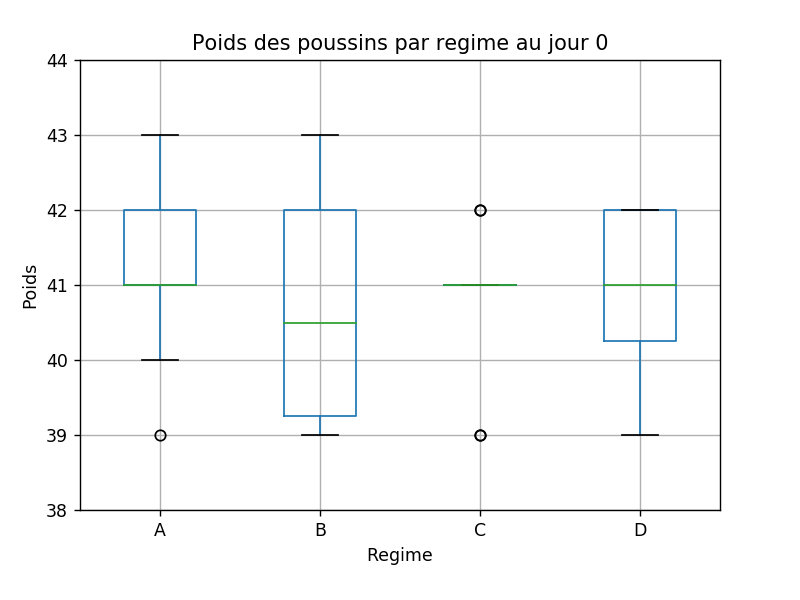

C:\Users\Arnaud\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


(38, 44)

In [19]:
chick_0.boxplot(column='poids',by='regime')
plt.title("Poids des poussins par regime au jour 0")
plt.suptitle("")
plt.ylabel("Poids")
plt.xlabel("Regime")
plt.ylim(38,44)

Les quatre boxplots ont tous la même tendance centrale (médianes quasi identiques). Il y a des petites différences concernant la dispersion, mais il est possible qu'elles sont dues à la petite taille des échantillons. Globabelment, les quatre groupes se ressemblent beaucoup au début de l'étude, autrement dit c'est la même situtation de départ pour tout le monde. C'est important pour pouvoir comparer l'efficacité des différents régimes.


## Question 3

On prodède comme précédemment :

<IPython.core.display.Javascript object>


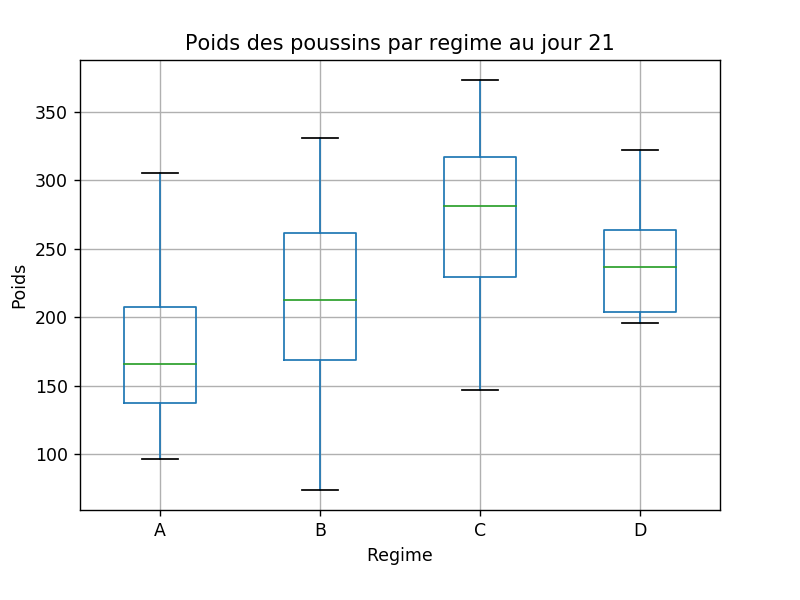

Text(0.5,0,u'Regime')

In [20]:
chick_21 = chick.loc[chick['jour']==21] 
chick_21.boxplot(column='poids',by='regime')
plt.title("Poids des poussins par regime au jour 21")
plt.suptitle("")
plt.ylabel("Poids")
plt.xlabel("Regime")

On observe une prise de poids pour les quatre régimes, en revanche il y a des différences significatives entre les régimes. Les médianes du poids final par régime varient énormément. Le régime C a le médiane la plus élevée, suivi par les régime D et B. Le régime A semble le moins efficace. Les régimes A, B et C ont des dispersions comparables, alors que la variance du poids final des poussins du régime D est nettement inférieure. Par conséquent, bien que les régimes B et D ont des médianes comparables, le régime D est préférable au régime B, car le régime D a un effet plus constante sur le poids.

## Question 4

Importons les données des neurons et traçons leurs histogrammes :

In [21]:
nerve = pd.read_csv('http://www.proba.jussieu.fr/pageperso/rebafka/nerve.csv',squeeze=True)
nerve2 = pd.read_csv('http://www.proba.jussieu.fr/pageperso/rebafka/nerve2.csv',squeeze=True)
nerve3 = pd.read_csv('http://www.proba.jussieu.fr/pageperso/rebafka/nerve3.csv',squeeze=True)

<IPython.core.display.Javascript object>


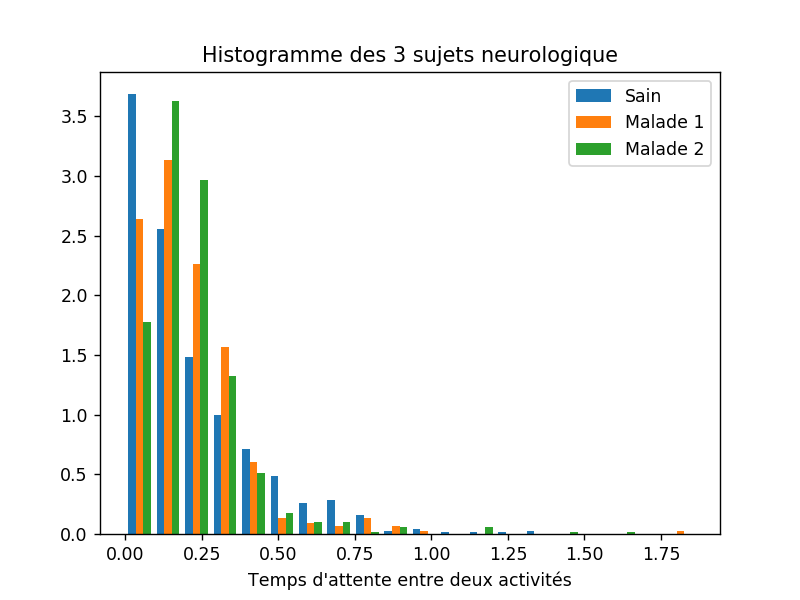

C:\Users\Arnaud\Anaconda2\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\Arnaud\Anaconda2\lib\site-packages\numpy\lib\function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


Text(0.5,0,u"Temps d'attente entre deux activit\xe9s")

In [22]:
plt.figure()
plt.hist((nerve,nerve2,nerve3), normed=True,bins=20)
plt.legend(["Sain", "Malade 1", "Malade 2"])
plt.title("Histogramme des 3 sujets neurologique")
plt.xlabel(u"Temps d'attente entre deux activités")

On observe trois histogrammes qui cumulent des observations près de 0. 
L'histogramme associé au sujet en bonne santé est décroissante, alors que les deux autres sont unimodales avec un pic vers 0.2. Les personnes malades semblent aussi avoir des valeurs extrêmes plus élevées que la personne en bonne santé. Au vu des histogrammes, il n'est cependant pas évident de conclure si les trois distributions sont les mêmes ou pas. Il est plus pertinent d'analyser les QQ-plots.

## Question 5

In [23]:
for nom, data in zip(['en bonne sante','malade 1','malade 2'],[nerve, nerve2, nerve3]):
    print('Pour la personne '+nom+' :')
    print('coef d asymetrie: {}, coef d aplatissement: {}'.format(data.skew(),data.kurt()))
    print('-------------------------------------------------------------')

Pour la personne en bonne sante :
coef d asymetrie: 1.76456296941, coef d aplatissement: 3.94706982693
-------------------------------------------------------------
Pour la personne malade 1 :
coef d asymetrie: 2.9373760694, coef d aplatissement: 18.2813045927
-------------------------------------------------------------
Pour la personne malade 2 :
coef d asymetrie: 3.30930097382, coef d aplatissement: 18.4039914786
-------------------------------------------------------------


Le coefficient d'asymétrie est plus élevé chez les personnes malades ce qui se voit sur la figure précédente car leur distribution est plus étalée à droite que celle de la personne en bonne santé. Le coefficient d'aplatissement est lui aussi plus élevé chez les personnes malades ce qui se voit sur la figure précédente car leur distribution est plus concentré (vers 0.2).

## Question 6

Chargeons d'abord la fonction **qqplot** :

In [24]:
def qqplot(x, y, alpha=np.arange(0.05,0.95,.01)):
    qx = x.quantile(alpha)
    qy = y.quantile(alpha)
    plt.scatter(qx, qy, marker='o',s=60, facecolor='white', edgecolors='red', linewidths=1);    
    plt.plot(qx, qx, '--')

<IPython.core.display.Javascript object>


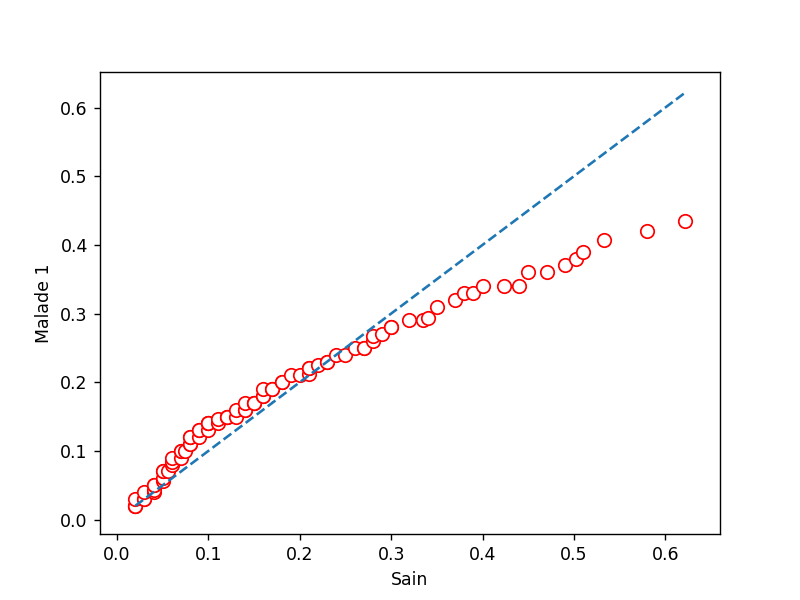

Text(0,0.5,u'Malade 1')

In [25]:
plt.figure()
qqplot(nerve,nerve2)
plt.xlabel(u"Sain")
plt.ylabel(u"Malade 1")

<IPython.core.display.Javascript object>


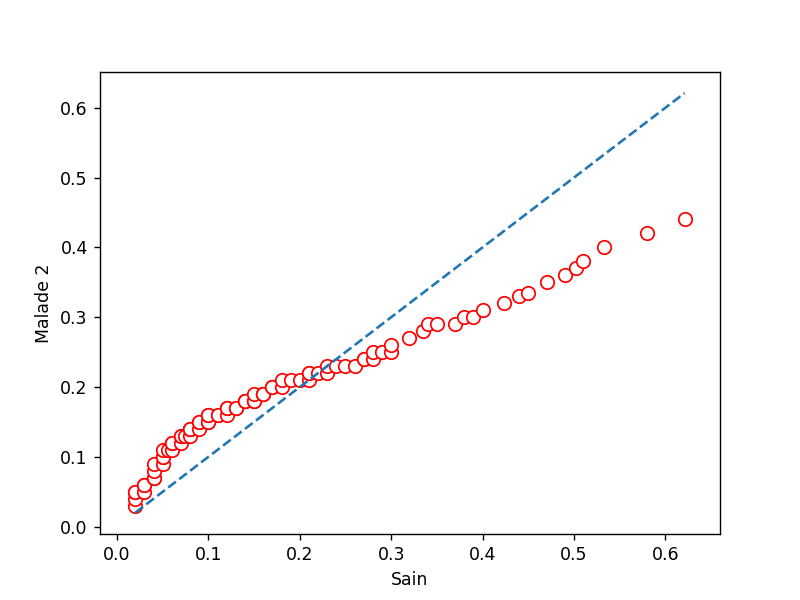

Text(0,0.5,u'Malade 2')

In [26]:
plt.figure()
qqplot(nerve,nerve3)
plt.xlabel(u"Sain")
plt.ylabel(u"Malade 2")

<IPython.core.display.Javascript object>


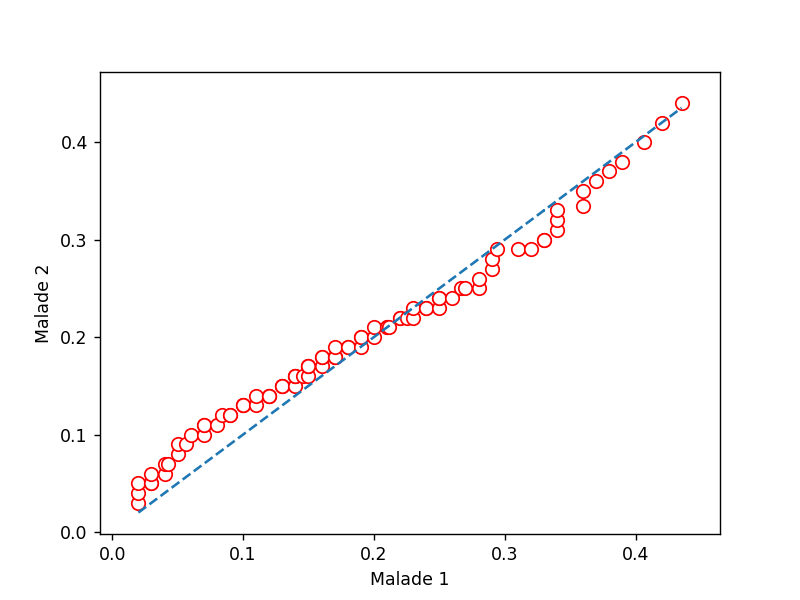

Text(0,0.5,u'Malade 2')

In [27]:
plt.figure()
qqplot(nerve2,nerve3)
plt.xlabel(u"Malade 1")
plt.ylabel(u"Malade 2")

Les deux premiers QQ-plot montrent qu'il y a une différence significative entre les échantillons comparés, car les points du QQ-plot ne s'alignent pas sur une droite. En conclusion, la personne en bonne santé ne se comporte pas comme les deux malades. En revanche, les points du QQ-plot comparant les deux malades sont bien alignés sur la première bissectrice indiquant qu'ils suivent la même distribution.